<a href="https://colab.research.google.com/github/Harshavardhan2006/ADM-Project/blob/main/Loan_Approval_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

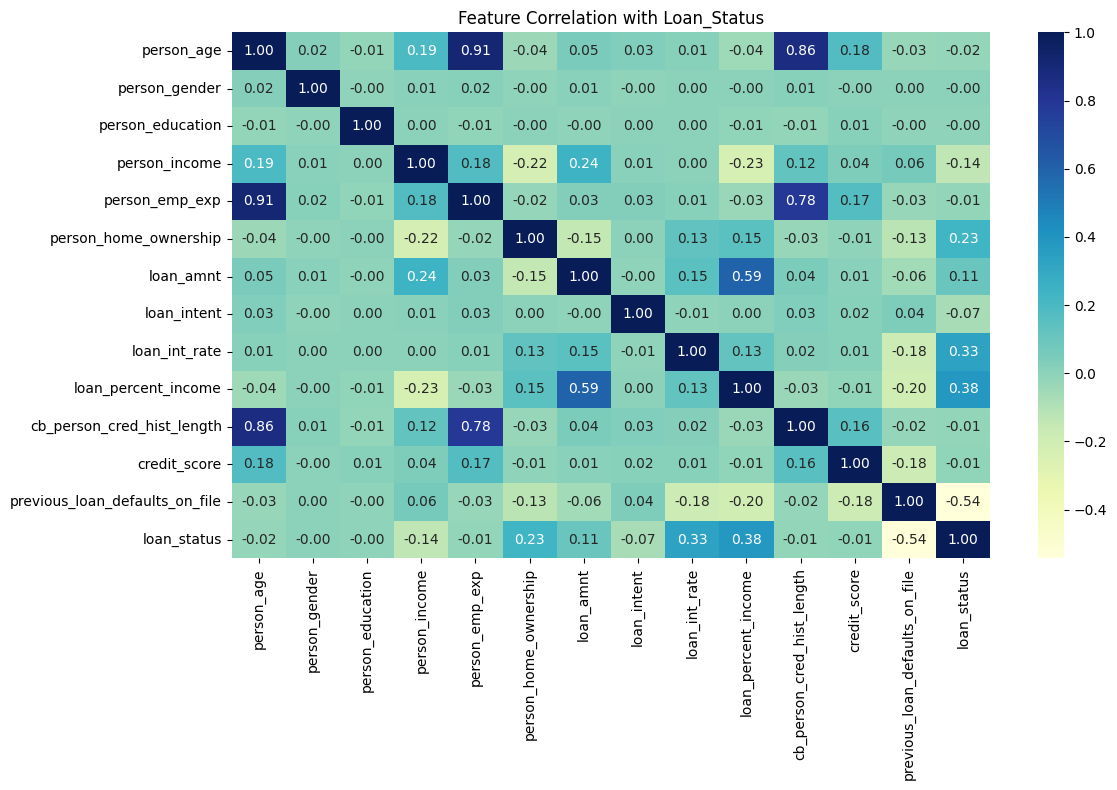

✅ Accuracy: 0.9263333333333333

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.88      0.77      0.82      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.92      0.93      0.92      9000

🔁 Cross-Validation Accuracy: 0.92 ± 0.01


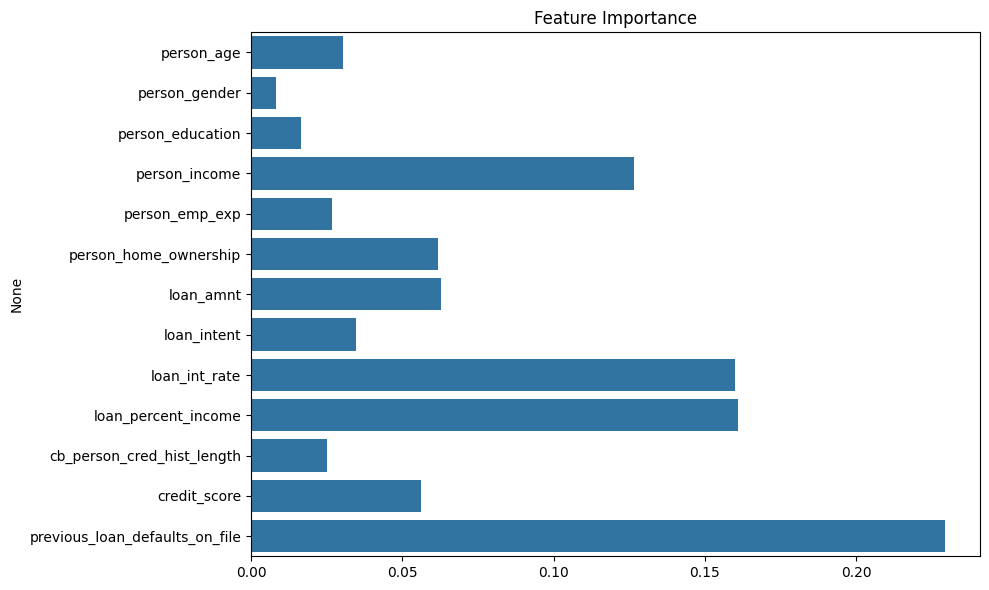

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("Loan_Approval.csv")
df_cleaned = df.copy()
cols_to_replace = ['person_income', 'person_emp_exp', 'loan_amnt',
                   'loan_int_rate', 'credit_score']
df_cleaned[cols_to_replace] = df_cleaned[cols_to_replace].replace(0, np.nan)
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)
df_cleaned.fillna(df_cleaned.mode().iloc[0], inplace=True)

cat_cols = df_cleaned.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Correlation with Loan_Status")
plt.tight_layout()
plt.show()

X = df_cleaned.drop("loan_status", axis=1)
y = df_cleaned["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)
print("🔁 Cross-Validation Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))

importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()